In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [5]:
df = pd.read_csv("College_Data", index_col="Unnamed: 0")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

<AxesSubplot:>

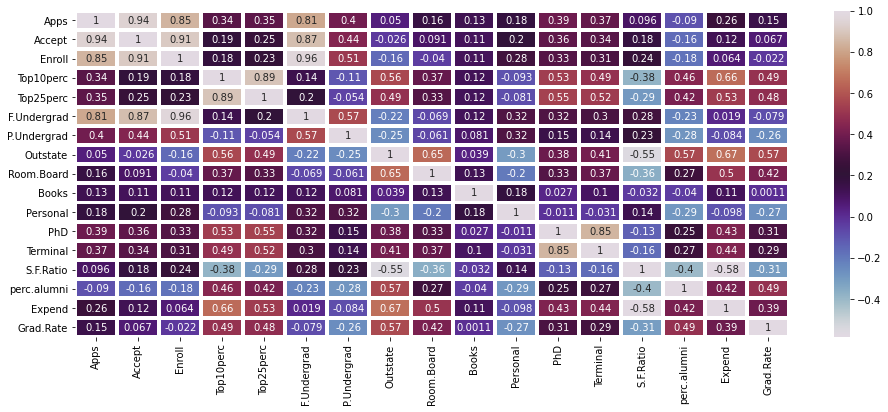

In [7]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, linewidths=3, linecolor="w", cmap="twilight")

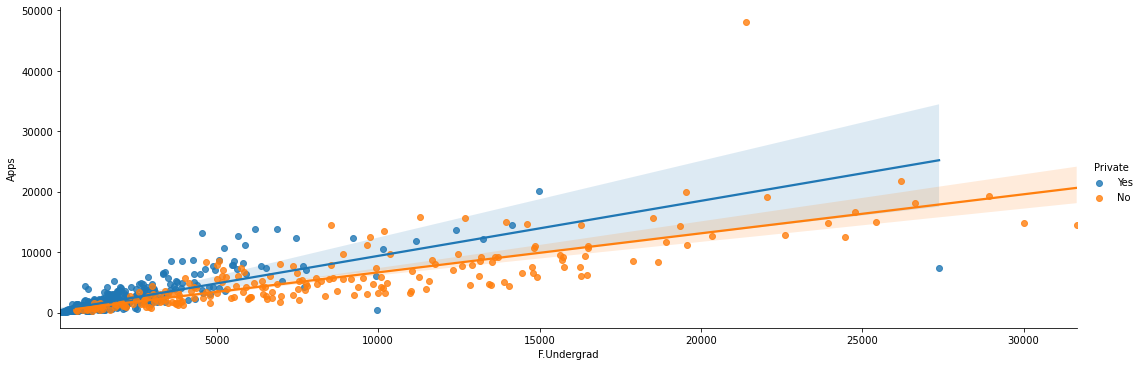

In [8]:
sns.lmplot(x = "F.Undergrad", y = "Apps", data = df, aspect=3, height=5, hue="Private")

In [9]:
df.reset_index(inplace=True)

In [10]:
df.drop("index", axis=1, inplace=True)

In [11]:
X = df.drop("Private", axis=1)
y = df["Private"]

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Logistic

In [13]:
lr_model = LogisticRegression(n_jobs=400)

In [14]:
lr_model.fit(X_train, y_train)

LogisticRegression(n_jobs=400)

In [15]:
predictions = lr_model.predict(X_test)

In [16]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

          No       0.86      0.82      0.84        67
         Yes       0.93      0.95      0.94       167

    accuracy                           0.91       234
   macro avg       0.89      0.88      0.89       234
weighted avg       0.91      0.91      0.91       234



<AxesSubplot:xlabel='Private', ylabel='count'>

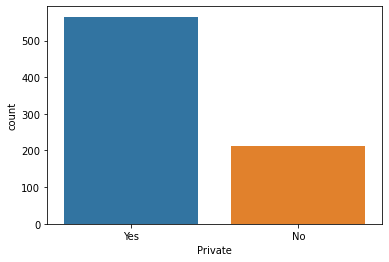

In [17]:
sns.countplot(x = df["Private"])

## K nearest
- Scale data

In [18]:
scalar = StandardScaler()

In [19]:
scaledData = scalar.fit_transform(df.drop("Private", axis=1))

In [20]:
X = scaledData
y = df["Private"]

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
k_near_model = KNeighborsClassifier(n_neighbors=8)

In [23]:
k_near_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [24]:
k_predict = k_near_model.predict(X_test)

In [25]:
print(classification_report(k_predict, y_test))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86        61
         Yes       0.96      0.94      0.95       173

    accuracy                           0.93       234
   macro avg       0.90      0.91      0.91       234
weighted avg       0.93      0.93      0.93       234



## Elbow method
- returns 5 as as proper number of neighbors so we will replace in model creation

In [26]:
error_rate = []
for i in range(1,10):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    knPred = kn.predict(X_test)
    error_rate.append(np.mean(knPred != y_test))

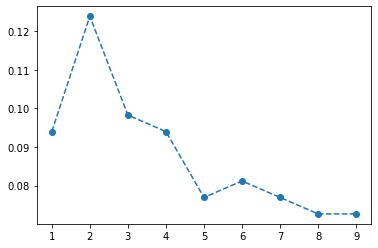

In [27]:
plt.plot(range(1,10),error_rate, marker = "o", ls = "--")

## Random Forest

In [28]:
rfModel = RandomForestClassifier(n_estimators=200, n_jobs=400)

In [29]:
X = df.drop("Private", axis=1)
y = df["Private"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
rfModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=400)

In [32]:
rfPred = rfModel.predict(X_test)

In [33]:
print(classification_report(rfPred, y_test))

              precision    recall  f1-score   support

          No       0.83      0.85      0.84        62
         Yes       0.95      0.94      0.94       172

    accuracy                           0.91       234
   macro avg       0.89      0.90      0.89       234
weighted avg       0.92      0.91      0.91       234



### SVM
- Scale

In [34]:
X = scaledData
y = df["Private"]

In [35]:
svm = SVC()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
svm.fit(X_train, y_train)

SVC()

In [38]:
svmPred = svm.predict(X_test)

In [39]:
print(classification_report(svmPred, y_test))

              precision    recall  f1-score   support

          No       0.81      0.91      0.86        57
         Yes       0.97      0.93      0.95       177

    accuracy                           0.93       234
   macro avg       0.89      0.92      0.91       234
weighted avg       0.93      0.93      0.93       234



In [40]:
graphParam = {"C": [1.0,10,100,1000], "gamma": [0.1,0.001,0.0001, 0.00001]}

In [41]:
graph = GridSearchCV(estimator=SVC(), param_grid=graphParam, verbose=3)

In [42]:
graph.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...............................C=1.0, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=1.0, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=1.0, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=1.0, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=1.0, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=1.0, gamma=0.001; total time=   0.0s
[CV 2/5] END .............................C=1.0, gamma=0.001; total time=   0.0s
[CV 3/5] END .............................C=1.0, gamma=0.001; total time=   0.0s
[CV 4/5] END .............................C=1.0, gamma=0.001; total time=   0.0s
[CV 5/5] END .............................C=1.0, gamma=0.001; total time=   0.0s
[CV 1/5] END ............................C=1.0, gamma=0.0001; total time=   0.0s
[CV 2/5] END ............................C=1.0, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 10, 100, 1000],
                         'gamma': [0.1, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [43]:
graphPred = graph.predict(X_test)

In [44]:
print(classification_report(graphPred, y_test))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86        61
         Yes       0.96      0.94      0.95       173

    accuracy                           0.93       234
   macro avg       0.90      0.91      0.91       234
weighted avg       0.93      0.93      0.93       234



## Kmeans CLuster
- will use to test the Private target only has two cluster or if we may have another group in this data set

In [45]:
cluster = KMeans(n_clusters=5)

In [46]:
cluster.fit_transform(df.drop("Private", axis=1))

array([[ 2568.95820157, 10664.434186  ,  8410.63348505, 28873.94408213,
        24223.66420614],
       [ 5376.1935078 ,  4738.77657381, 10371.00485407, 23929.46134673,
        23650.21254436],
       [ 2618.58501522,  6759.41172199, 11042.87066725, 26421.76032466,
        25635.40016095],
       ...,
       [ 3038.0218793 , 10154.21871154,  8221.73210834, 27725.72910238,
        23720.65995393],
       [36172.96404025, 28703.23606341, 36055.54715191,  8475.97576192,
        36028.29185438],
       [ 5827.6276529 , 14063.90320249,  8186.85868528, 31691.41989968,
        23940.16909459]])

In [47]:
clusterLabels = cluster.labels_

<AxesSubplot:ylabel='count'>

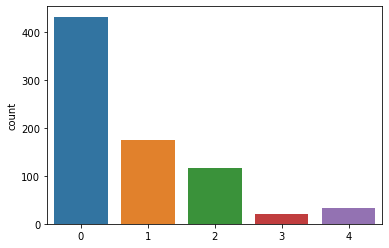

In [48]:
sns.countplot(x = clusterLabels)

In [49]:
X = df.drop("Private", axis=1)
y = clusterLabels

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
logRegg = LogisticRegression(n_jobs=400)

In [52]:
logRegg.fit(X_train, y_train)

LogisticRegression(n_jobs=400)

In [53]:
logg_pregg = logRegg.predict(X_test)

In [54]:
print(classification_report(logg_pregg, y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       138
           1       0.73      0.76      0.74        46
           2       0.82      0.82      0.82        33
           3       1.00      0.86      0.92         7
           4       0.46      0.60      0.52        10

    accuracy                           0.85       234
   macro avg       0.79      0.79      0.78       234
weighted avg       0.85      0.85      0.85       234



## Elbow

In [58]:
error_Rate = []
for i in range(1,10):
    clus = KMeans(n_clusters=i)
    clus.fit(df.drop("Private", axis=1))
    error_Rate.append(np.mean(clus.labels_ != df["Private"]))

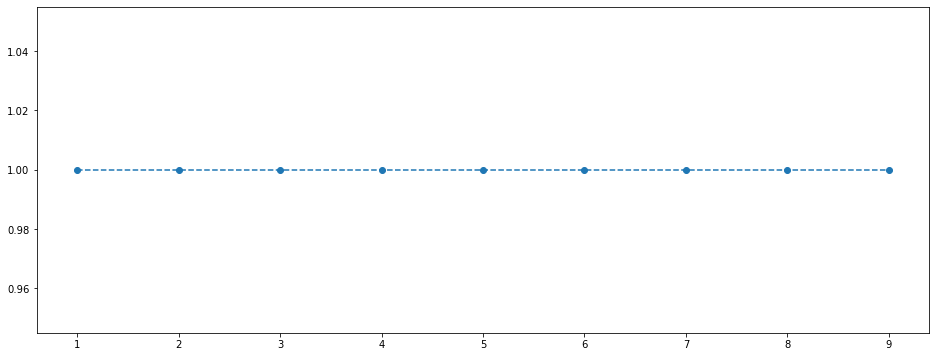

In [59]:
plt.figure(figsize = (16,6))
plt.plot(range(1,10), error_Rate, ls= "--", marker = "o")